# 確率ロボティクス_課題

とある走行ロボットを走らせるプログラムを改良しました。
改良前は、
・完走→失敗→失敗→完走→完走（5回中3回完走）
という結果でした。
改良後は、
・完走→完走→完走→完走→完走（5回中5回完走）
という結果でした。

課題：改良前と改良後を比較してみたらどうなるでしょう？

まず、確率分布を計算するための関数を配布されたプリントに記載されている(5.5)の式から作成

In [1]:
#(離散化したtの個数、tの値、走行結果：)
def prob_dist(units, t, alpha = True):
    p_t = 1 / units
    if alpha == True:
        p_a_t = t #完走率
    else:
        p_a_t = 1 - t
    p_t_a = p_a_t * p_t
    return p_t_a

#(tの範囲、確率分布、走行結果：成功ならTrue)
def prob_dist_t1(zs, ys, alpha):
    if alpha == 1:
        ys = [ys[z] * prob_dist(len(zs), t = z/len(zs), alpha = True) for z in zs]
    else:
        ys = [ys[z] * prob_dist(len(zs), t = z/len(zs), alpha = False) for z in zs]
        
    #正規化処理、1/sum(ys):正規化定数
    ys = [ys[z] * 1/sum(ys) for z in zs]
    return ys

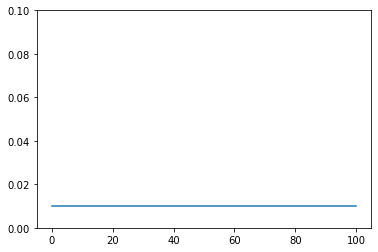

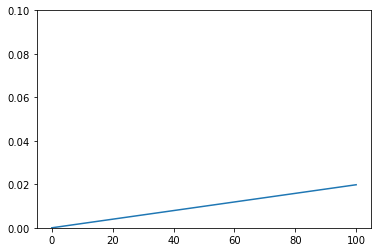

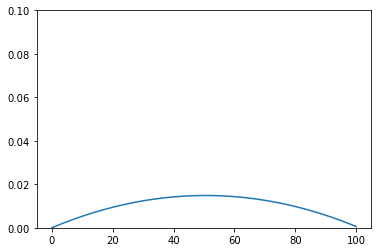

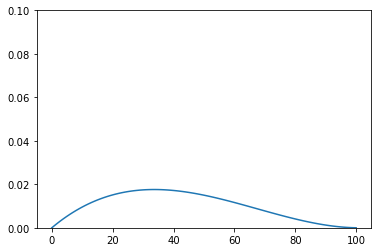

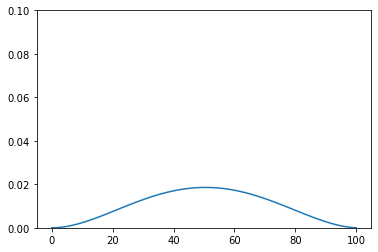

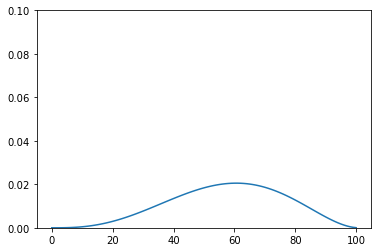

In [2]:
import matplotlib.pyplot as plt

#事前分布
zs = range(0,101)
ys_before = [1/len(zs) for z in zs]
plt.ylim(0,0.1)
plt.plot(zs,ys_before)
plt.show()

#走行結果
alpha_t = [1,0,0,1,1]

for z in alpha_t:
    ys_before = prob_dist_t1(zs,ys_before,alpha = z)
    plt.ylim(0,0.1)
    plt.plot(zs,ys_before)
    plt.show()

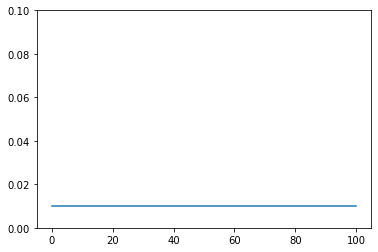

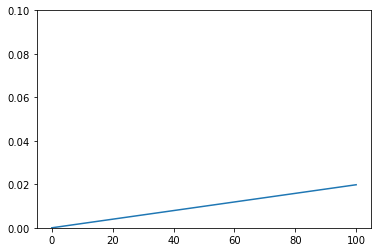

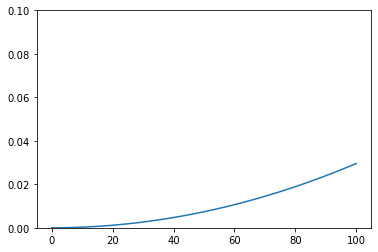

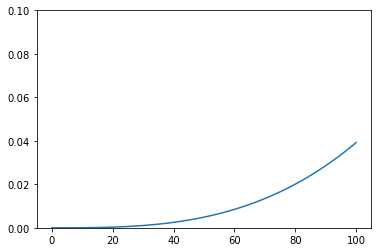

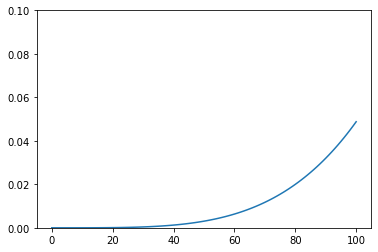

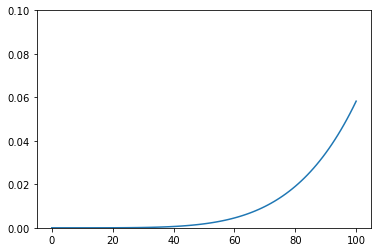

In [3]:
zs = range(0,101)
ys_after = [1/len(zs) for z in zs]
plt.ylim(0,0.1)
plt.plot(zs,ys_after)
plt.show()

alpha_t = [1,1,1,1,1]
for z in alpha_t:
    ys_after = prob_dist_t1(zs,ys_after,alpha = z)
    plt.ylim(0,0.1)
    plt.plot(zs,ys_after)
    plt.show()

In [4]:
exp_before = sum([ys_before[t] * t/100 for t in zs])
print(exp_before)

exp_after = sum([ys_after[t] * t/100 for t in zs])
print(exp_after)

0.5771428432786431
0.8613859271535352


求めた改良前と改良後の確率分布の期待値を計算し、比較する
比較したところ、どうやら改良前に比べ、改良後は1.5倍ほど期待値が上がっている。
改良後がどのくらい良くなったかは、なんとなく分かったが、この比較方法が正しいのか分からないので、他の方法でも比較をしてみる。

In [5]:
print(exp_after/exp_before)

1.492500404683456
